<a href="https://colab.research.google.com/github/vedant230902/Face_Mask_Using_CNN-/blob/main/face_mask_recognition_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the required libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# cv2 used for image processing and other tasks
import cv2
# creates a new window and displays image in that window
from google.colab.patches import cv2_imshow
# from pillow library importing images
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
# printing first and last 5 files
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1050.jpg', 'with_mask_533.jpg', 'with_mask_2820.jpg', 'with_mask_3504.jpg', 'with_mask_130.jpg']
['with_mask_1868.jpg', 'with_mask_1383.jpg', 'with_mask_1975.jpg', 'with_mask_3572.jpg', 'with_mask_3719.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3211.jpg', 'without_mask_2282.jpg', 'without_mask_3004.jpg', 'without_mask_3057.jpg', 'without_mask_1426.jpg']
['without_mask_2269.jpg', 'without_mask_2993.jpg', 'without_mask_2544.jpg', 'without_mask_3264.jpg', 'without_mask_3035.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

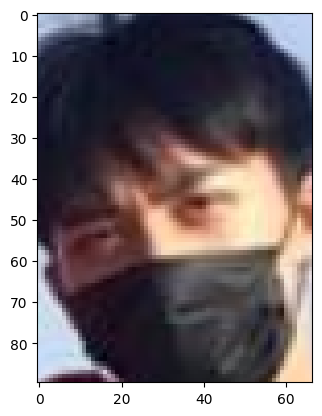

In [ ]:
# displaying with mask image
# creating a variable img and putting tthe path in tthe imread function
img = mpimg.imread('/content/data/with_mask/with_mask_110.jpg')
imgplot = plt.imshow(img)
plt.show()

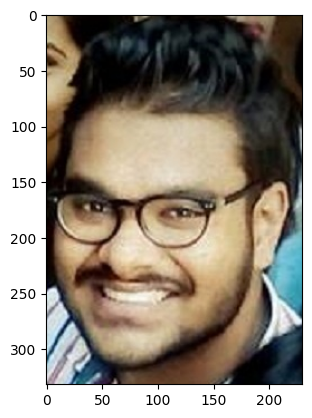

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1111.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []
# with this for loop we read the image with its path and its file name
for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')

  #converting image into a numpy array
  image = np.array(image)
  #putting all the new data into the data file created
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  #converting image into a numpy array
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 47,  63, 103],
        [ 43,  65, 103],
        [ 46,  66, 105],
        ...,
        [100, 101, 110],
        [ 99, 101, 108],
        [ 95, 105, 106]],

       [[ 46,  64, 112],
        [ 39,  63, 109],
        [ 42,  64, 111],
        ...,
        [103, 104, 108],
        [ 96, 103, 107],
        [ 99, 103, 110]],

       [[ 36,  66, 113],
        [ 36,  63, 102],
        [ 44,  65, 104],
        ...,
        [103,  99, 107],
        [ 97, 101, 105],
        [104, 101, 107]],

       ...,

       [[116, 114, 113],
        [122, 115, 117],
        [119, 113, 115],
        ...,
        [ 84,  69,  66],
        [ 98,  78,  80],
        [114,  88,  96]],

       [[122, 112, 108],
        [116, 114, 109],
        [114, 114, 110],
        ...,
        [142, 119, 108],
        [147, 122, 114],
        [147, 123, 110]],

       [[124, 111, 104],
        [120, 115, 107],
        [120, 115, 110],
        ...,
        [151, 125, 110],
        [152, 124, 116],
        [150, 122, 115]]], dtype=uint8)
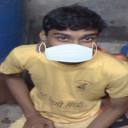

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

converting image list and label list to numpy arrays

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)


numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Trai Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
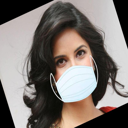

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

**Building and training the CNN model**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# defining the no. of classes we have which is 2 with and without mask
num_of_classes = 2

model = keras.Sequential()

# creating the first layer with a filter size of 32 and kernel size or 3 X 3 and using relu as our activation function
# and specifying our image size
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
#creating a maxpool layer to reduce the spatial dimensions (width and height) of the feature maps while retaining the most important information.
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# adding more layers changing filters
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# the given data is in the form of a matrix but we need to input it as a single dimensional data or as a vector
model.add(keras.layers.Flatten())

# creating a denselayer with 128 neurons
model.add(keras.layers.Dense(128, activation='relu'))
# using dropout regularization to reduce overfitting, by randomly dropping neurons
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# final layer with 2 final neurons equal to the number of classes we have
# we use sigmoid as the activation function as this is a binary classification problem
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 12s 29ms/step - loss: 0.4229 - acc: 0.8181 - val_loss: 0.2663 - val_acc: 0.8975
Epoch 2/10
170/170 [==============================] - 4s 25ms/step - loss: 0.2789 - acc: 0.8803 - val_loss: 0.2533 - val_acc: 0.9091
Epoch 3/10
170/170 [==============================] - 5s 29ms/step - loss: 0.2356 - acc: 0.9086 - val_loss: 0.2105 - val_acc: 0.9157
Epoch 4/10
170/170 [==============================] - 4s 23ms/step - loss: 0.2096 - acc: 0.9154 - val_loss: 0.2205 - val_acc: 0.9174
Epoch 5/10
170/170 [==============================] - 4s 25ms/step - loss: 0.1793 - acc: 0.9294 - val_loss: 0.1969 - val_acc: 0.9289
Epoch 6/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1374 - acc: 0.9491 - val_loss: 0.1840 - val_acc: 0.9339
Epoch 7/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1229 - acc: 0.9538 - val_loss: 0.1738 - val_acc: 0.9455
Epoch 8/10
170/170 [==============================] - 3s 19ms/step -

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2371 - acc: 0.9351
Test Accuracy = 0.9351422786712646


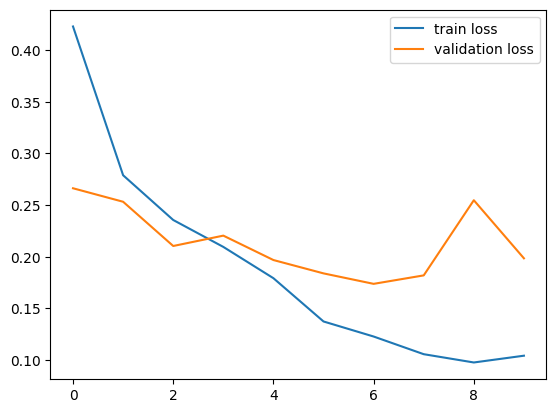

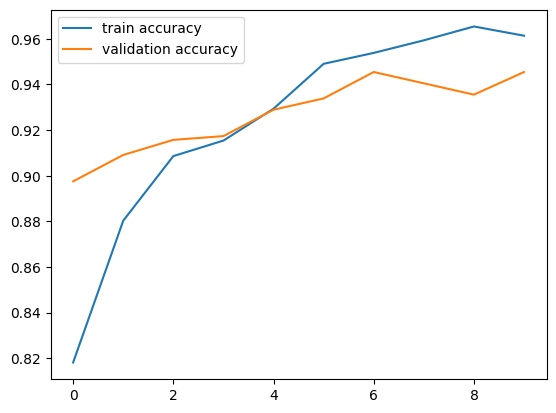

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/with mask.test.jpg


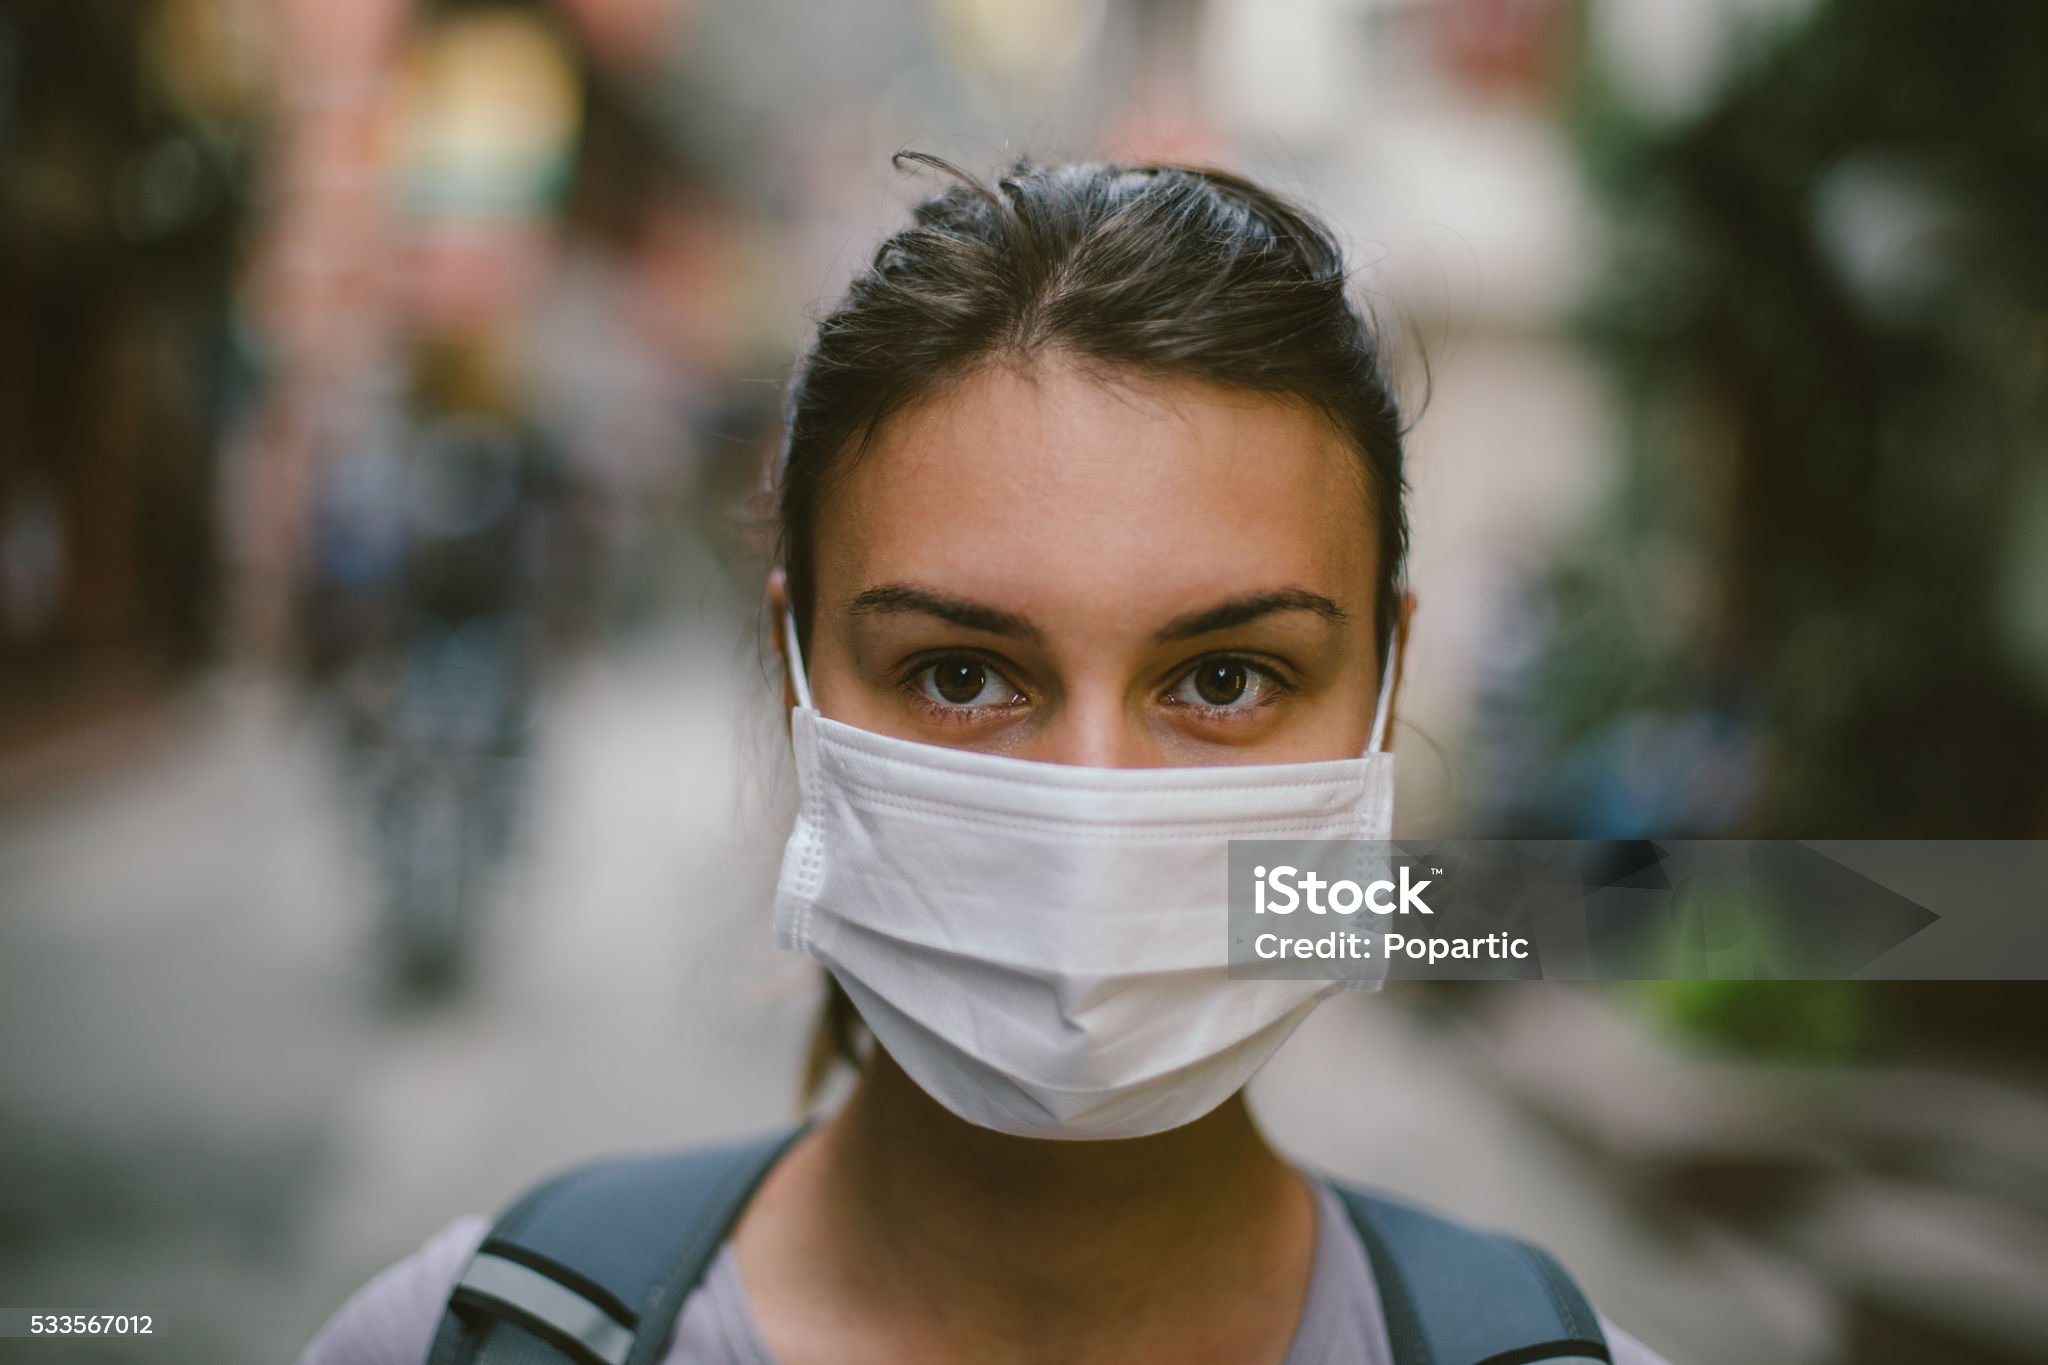

1/1 [==============================] - 0s 433ms/step
[[0.27170616 0.70678824]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

# reading the image
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255
# we are reshaping the data for a single sample.
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/withput mask.jpeg


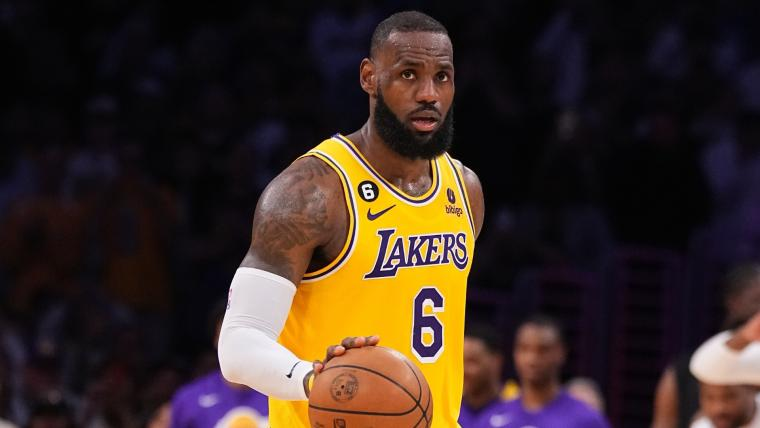

1/1 [==============================] - 0s 25ms/step
[[0.00114291 0.99928063]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')